## Grupowanie hierarchiczne

Z użyciem biblioteki scipy

### Import bibliotek

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.2)

### Wygenerowanie danych

In [13]:
from sklearn.datasets import make_blobs

# 10 punktów, dwa skupiska
data = make_blobs(n_samples=10, centers=2, cluster_std=1.0, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


### Wizualizacja danych

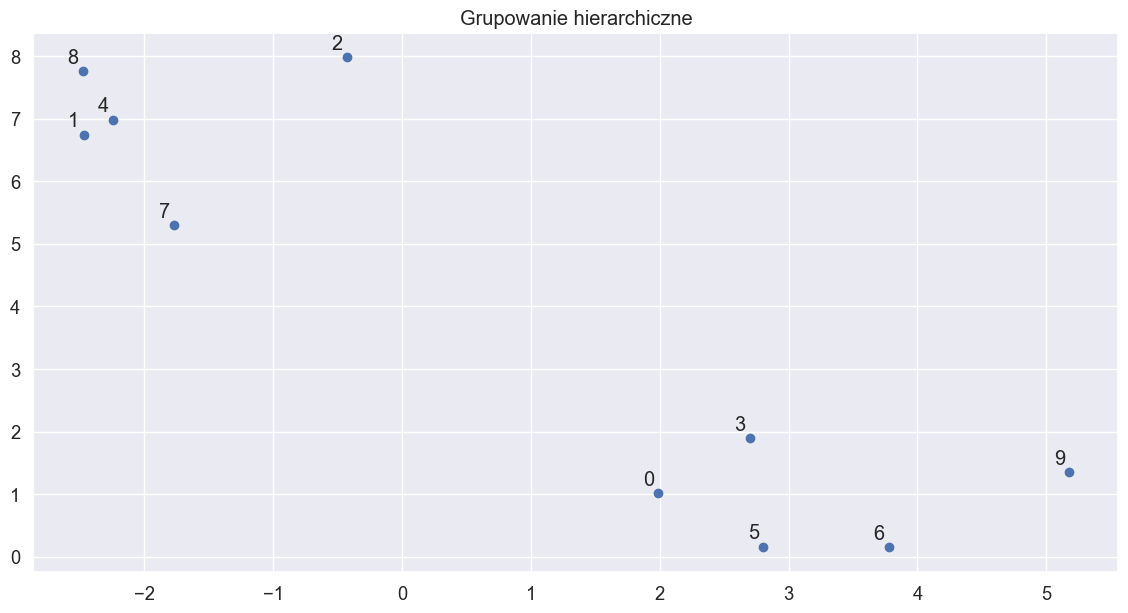

In [14]:
plt.figure(figsize=(14, 7))
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(10), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.title('Grupowanie hierarchiczne')
plt.show()

### Grupowanie

In [15]:
from scipy.cluster.hierarchy import linkage

# przeprowadzenie grupowania hierarchicznego
z = linkage(data)  # domyslnie metric='euclidean', method='single'
# The input y may be either a 1-D condensed distance matrix or a 2-D array of observation vectors.

print(type(z))
print(z)  
# macierz z o wymiarach (n-1) x 4
# W i-tej iteracji: 
#   - klastry z[i,0], z[i,1] są łączone żeby utworzyć n+i klaster
#   - odległość pomiędzy klasterem z[i,0] i z[i, 1] to z[i,2]
#   - z[i, 3] reprezentuje liczbę próbek w klastrze n+i

<class 'numpy.ndarray'>
[[ 1.          4.          0.32587935  2.        ]
 [ 8.         10.          0.81156282  3.        ]
 [ 5.          6.          0.97563165  2.        ]
 [ 0.          3.          1.12932761  2.        ]
 [12.         13.          1.17891599  4.        ]
 [ 7.         11.          1.61026809  4.        ]
 [ 9.         14.          1.84181288  5.        ]
 [ 2.         15.          2.06099196  5.        ]
 [16.         17.          5.61497883 10.        ]]


### Wizualizacja (dendogram)

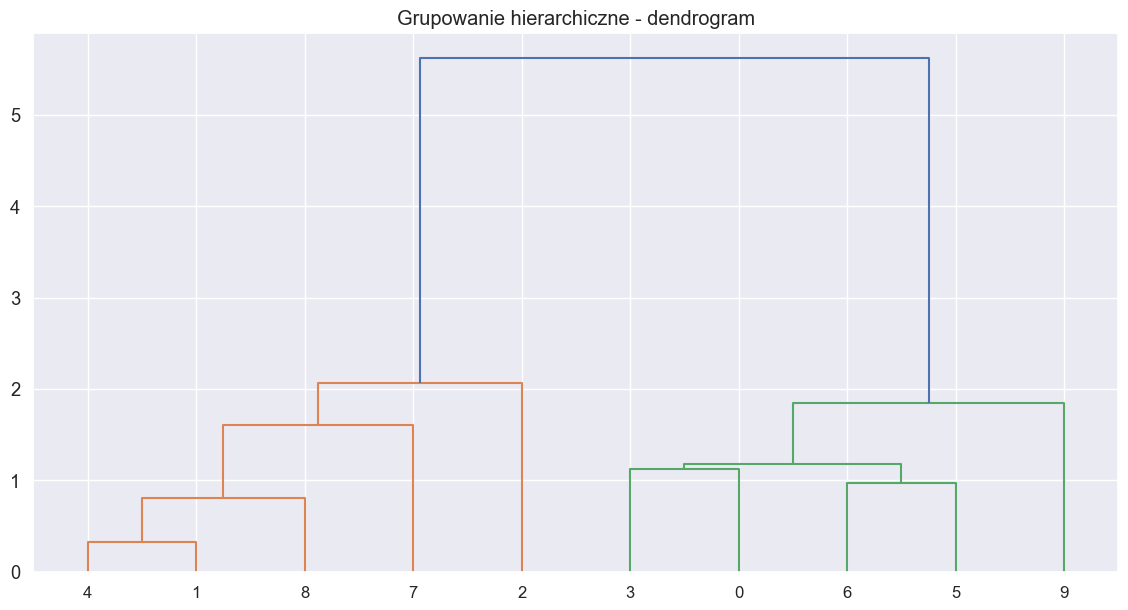

In [16]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(14, 7))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram')
plt.show()

### Popatrzmy na inne estymatory odległości międzyklastrowej

#### Complete

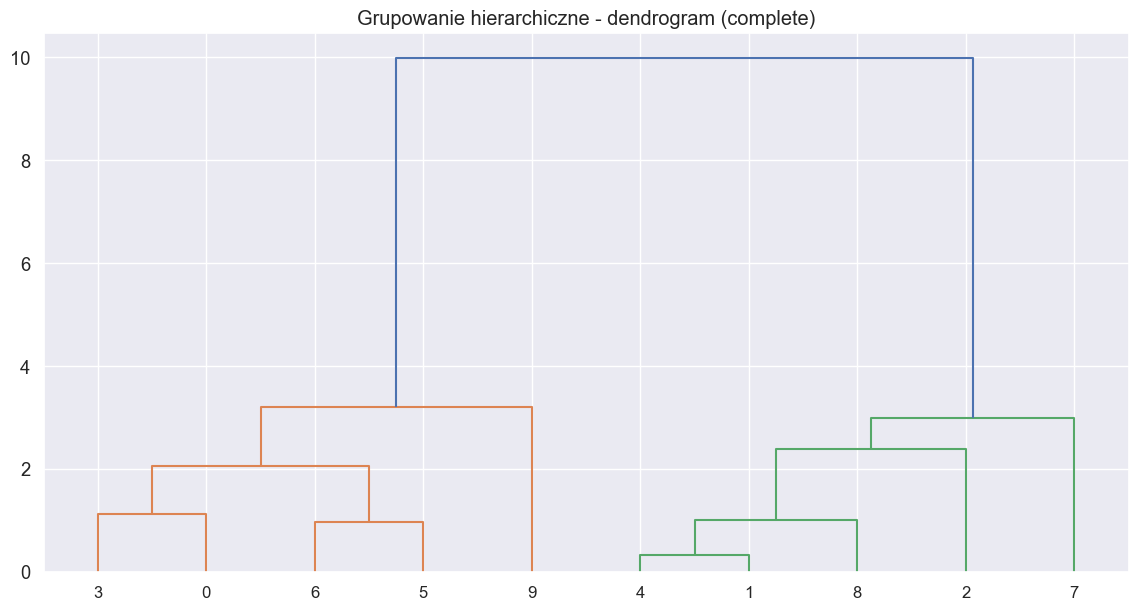

In [17]:
z = linkage(data, method='complete')

plt.figure(figsize=(14, 7))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram (complete)')
plt.show()

#### Average

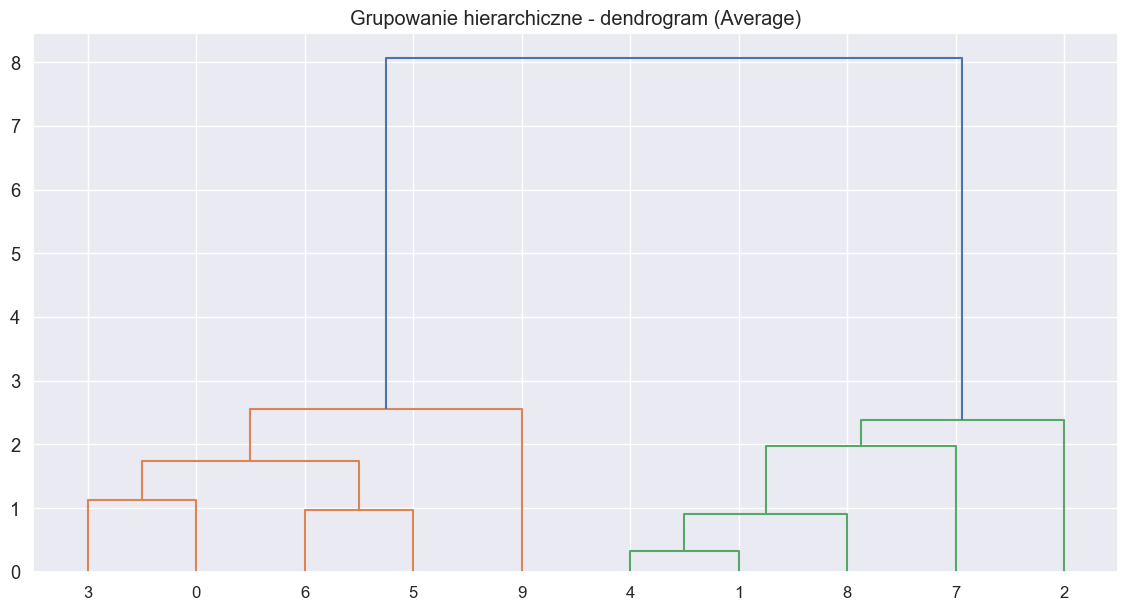

In [18]:
z = linkage(data, method='average')

plt.figure(figsize=(14, 7))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram (Average)')
plt.show()

#### Centroid

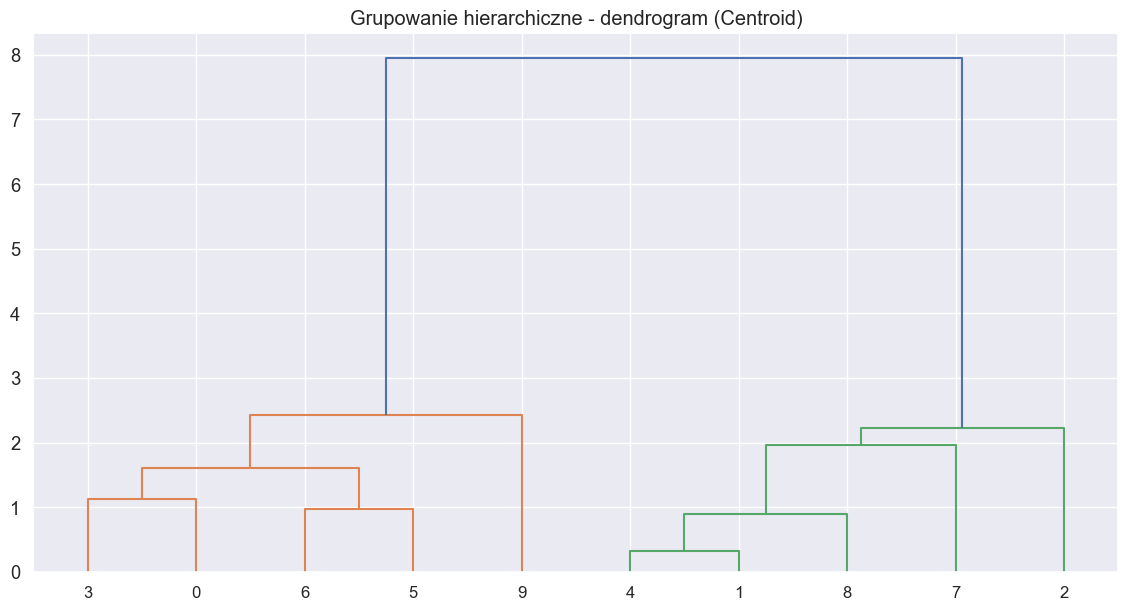

In [19]:
z = linkage(data, method='centroid')

plt.figure(figsize=(14, 7))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram (Centroid)')
plt.show()

#### Median

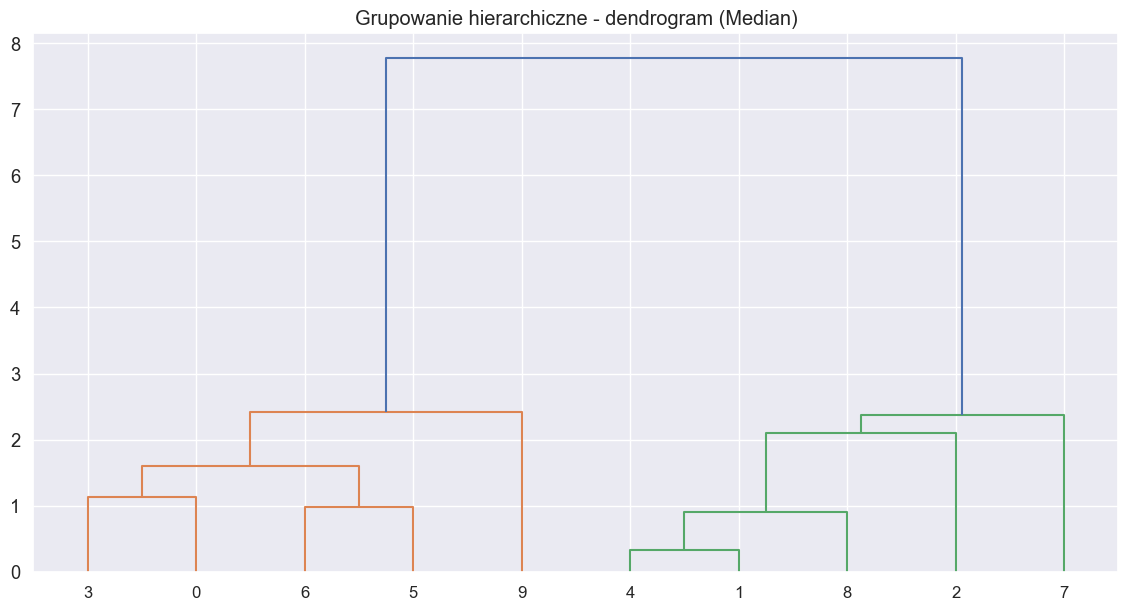

In [20]:
z = linkage(data, method='median')

plt.figure(figsize=(14, 7))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram (Median)')
plt.show()

#### Ward

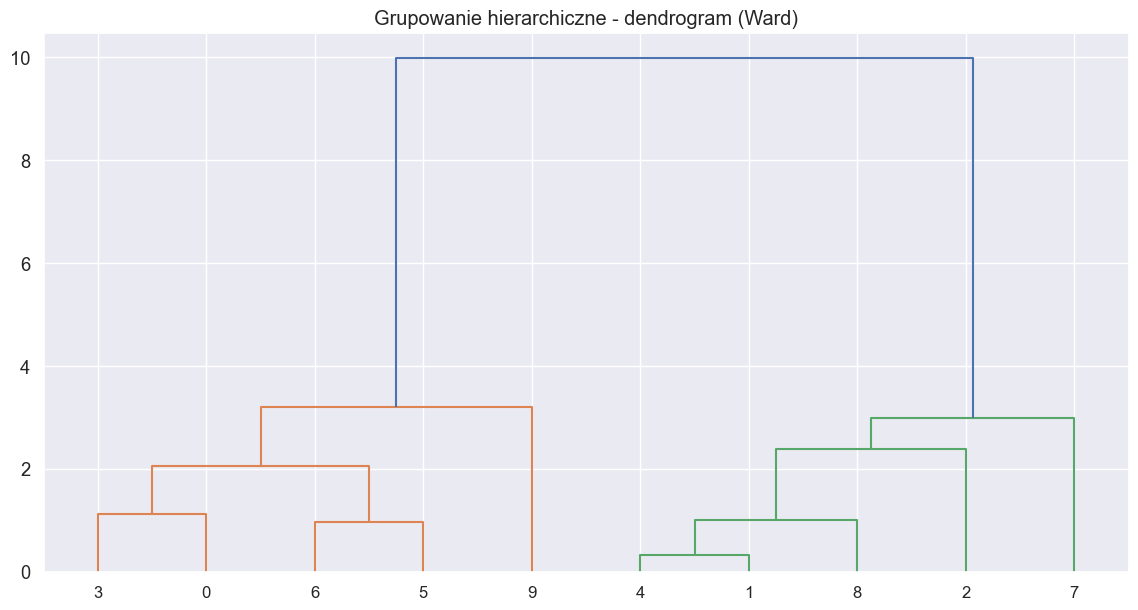

In [21]:
z = linkage(data, method='complete')

plt.figure(figsize=(14, 7))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram (Ward)')
plt.show()

Drzewo można obracać

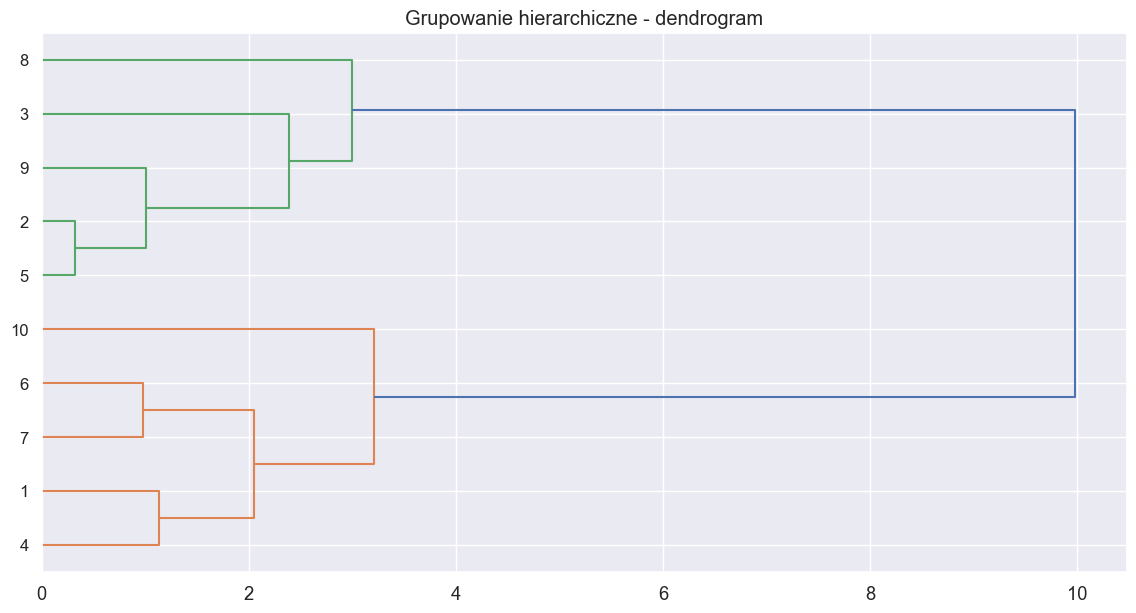

In [22]:
# zmiana orientacji dendogramu
plt.figure(figsize=(14, 7))
dendrogram(z, orientation='right', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram')
plt.show()